In [36]:
import numpy  as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import keras
from tensorflow.keras.callbacks import EarlyStopping

from pickle import dump
import re
import copy
import matplotlib.pyplot as plt

import utils

from utils import plot_nnpredict_45
import time

In [37]:
seed = 2134671

rand = np.random.RandomState(seed)
mInt = (1 << 15)  
MInt = (1 << 16)  

log_n = 14
NUM = (1 << log_n)

outputPrfx = "full"
challengePrfx = "challenge"
targetPrfx = "target"

bounds = { "x1": [-np.pi, np.pi]
         , "x2": [-np.pi, np.pi]
         }

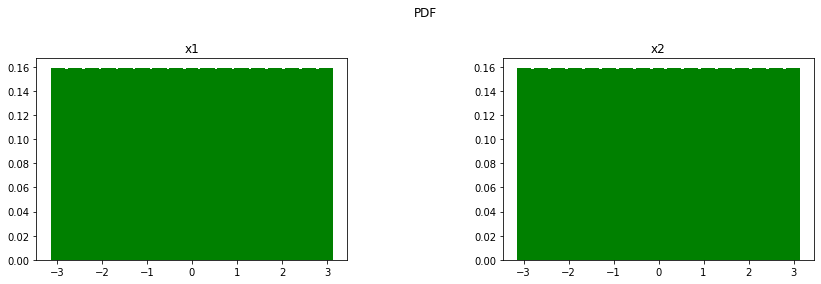

In [38]:
xDF = utils.lhs_sampling(rand, NUM, bounds=bounds)
utils.histo_params(xDF, title="PDF")

### In this Lab we will train a NN to approximate a very simple function: $y = \frac{1}{2} (\sin(x_1) + \cos(x_2))$

In [39]:
yDF = copy.deepcopy(xDF)
y = 0.5*(np.sin(xDF["x1"])+np.cos(xDF["x2"]))
yDF["y"] = y

In [40]:
yDF.head(5)

,x1,x2,y
0,-2.125139,0.142085,0.069838
1,-1.769255,2.837289,-0.967214
2,1.678367,1.742410,0.411723
3,-0.759512,1.174838,-0.151437
4,2.395503,-1.280299,0.482601


### train test splitting

In [41]:
train_set, test_set = train_test_split(yDF, test_size=0.25, random_state=rand.randint(mInt,MInt))

In [42]:
N_hiddenLayers = 3
N_nodes = 32
i = keras.layers.Input(shape=(2, ))
x = keras.layers.Dense(N_nodes, activation='swish')(i)
c = 0
while c < N_hiddenLayers:
    x = keras.layers.Dense(N_nodes, activation='swish')(x)
    c += 1
x = keras.layers.Dense(1, activation='linear')(x)

model = keras.models.Model(inputs=i, outputs=x)

In [43]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_5 (Dense)             (None, 32)                96        
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,297
Trainable params: 3,297
Non-trainable p

In [44]:
model.compile(loss='mse', optimizer='adam')

In [45]:
x_train = train_set.drop(columns="y")
y_train = train_set["y"]

In [46]:
LEN = len(x_train)
patience = 50
N_epochs = 500

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=patience)

model.fit(x_train, y_train, epochs=N_epochs, verbose=True, batch_size=LEN, validation_split=.25, 
          callbacks=[early_stopping])

Epoch 1/500
1/1 [==============================] - 1s 593ms/step - loss: 0.2526 - val_loss: 0.2390
Epoch 2/500
1/1 [==============================] - 0s 45ms/step - loss: 0.2430 - val_loss: 0.2299
Epoch 3/500
1/1 [==============================] - 0s 28ms/step - loss: 0.2340 - val_loss: 0.2214
Epoch 4/500
1/1 [==============================] - 0s 33ms/step - loss: 0.2256 - val_loss: 0.2135
Epoch 5/500
1/1 [==============================] - 0s 34ms/step - loss: 0.2177 - val_loss: 0.2062
Epoch 6/500
1/1 [==============================] - 0s 33ms/step - loss: 0.2104 - val_loss: 0.1993
Epoch 7/500
1/1 [==============================] - 0s 48ms/step - loss: 0.2035 - val_loss: 0.1929
Epoch 8/500
1/1 [==============================] - 0s 36ms/step - loss: 0.1972 - val_loss: 0.1870
Epoch 9/500
1/1 [==============================] - 0s 33ms/step - loss: 0.1913 - val_loss: 0.1816
Epoch 10/500
1/1 [==============================] - 0s 45ms/step - loss: 0.1859 - val_loss: 0.1767
Epoch 11/500
1/1 [

Epoch 84/500
1/1 [==============================] - 0s 34ms/step - loss: 0.0460 - val_loss: 0.0455
Epoch 85/500
1/1 [==============================] - 0s 34ms/step - loss: 0.0455 - val_loss: 0.0450
Epoch 86/500
1/1 [==============================] - 0s 34ms/step - loss: 0.0450 - val_loss: 0.0445
Epoch 87/500
1/1 [==============================] - 0s 32ms/step - loss: 0.0445 - val_loss: 0.0440
Epoch 88/500
1/1 [==============================] - 0s 36ms/step - loss: 0.0439 - val_loss: 0.0435
Epoch 89/500
1/1 [==============================] - 0s 34ms/step - loss: 0.0434 - val_loss: 0.0429
Epoch 90/500
1/1 [==============================] - 0s 35ms/step - loss: 0.0428 - val_loss: 0.0423
Epoch 91/500
1/1 [==============================] - 0s 32ms/step - loss: 0.0422 - val_loss: 0.0418
Epoch 92/500
1/1 [==============================] - 0s 38ms/step - loss: 0.0416 - val_loss: 0.0412
Epoch 93/500
1/1 [==============================] - 0s 29ms/step - loss: 0.0410 - val_loss: 0.0405
Epoch 94/5

1/1 [==============================] - 0s 34ms/step - loss: 0.0068 - val_loss: 0.0068
Epoch 167/500
1/1 [==============================] - 0s 47ms/step - loss: 0.0067 - val_loss: 0.0067
Epoch 168/500
1/1 [==============================] - 0s 36ms/step - loss: 0.0067 - val_loss: 0.0067
Epoch 169/500
1/1 [==============================] - 0s 31ms/step - loss: 0.0066 - val_loss: 0.0066
Epoch 170/500
1/1 [==============================] - 0s 34ms/step - loss: 0.0066 - val_loss: 0.0066
Epoch 171/500
1/1 [==============================] - 0s 33ms/step - loss: 0.0065 - val_loss: 0.0065
Epoch 172/500
1/1 [==============================] - 0s 48ms/step - loss: 0.0065 - val_loss: 0.0065
Epoch 173/500
1/1 [==============================] - 0s 34ms/step - loss: 0.0064 - val_loss: 0.0064
Epoch 174/500
1/1 [==============================] - 0s 33ms/step - loss: 0.0064 - val_loss: 0.0064
Epoch 175/500
1/1 [==============================] - 0s 42ms/step - loss: 0.0063 - val_loss: 0.0063
Epoch 176/500


1/1 [==============================] - 0s 19ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 249/500
1/1 [==============================] - 0s 34ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 250/500
1/1 [==============================] - 0s 33ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 251/500
1/1 [==============================] - 0s 34ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 252/500
1/1 [==============================] - 0s 34ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 253/500
1/1 [==============================] - 0s 33ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 254/500
1/1 [==============================] - 0s 34ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 255/500
1/1 [==============================] - 0s 32ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 256/500
1/1 [==============================] - 0s 34ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 257/500
1/1 [==============================] - 0s 33ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 258/500


1/1 [==============================] - 0s 34ms/step - loss: 7.3238e-04 - val_loss: 7.3079e-04
Epoch 329/500
1/1 [==============================] - 0s 33ms/step - loss: 7.2034e-04 - val_loss: 7.1913e-04
Epoch 330/500
1/1 [==============================] - 0s 32ms/step - loss: 7.0868e-04 - val_loss: 7.0784e-04
Epoch 331/500
1/1 [==============================] - 0s 42ms/step - loss: 6.9738e-04 - val_loss: 6.9690e-04
Epoch 332/500
1/1 [==============================] - 0s 37ms/step - loss: 6.8644e-04 - val_loss: 6.8630e-04
Epoch 333/500
1/1 [==============================] - 0s 39ms/step - loss: 6.7585e-04 - val_loss: 6.7602e-04
Epoch 334/500
1/1 [==============================] - 0s 31ms/step - loss: 6.6559e-04 - val_loss: 6.6608e-04
Epoch 335/500
1/1 [==============================] - 0s 34ms/step - loss: 6.5565e-04 - val_loss: 6.5644e-04
Epoch 336/500
1/1 [==============================] - 0s 34ms/step - loss: 6.4603e-04 - val_loss: 6.4710e-04
Epoch 337/500
1/1 [=======================

Epoch 404/500
1/1 [==============================] - 0s 33ms/step - loss: 3.5189e-04 - val_loss: 3.5735e-04
Epoch 405/500
1/1 [==============================] - 0s 33ms/step - loss: 3.4991e-04 - val_loss: 3.5536e-04
Epoch 406/500
1/1 [==============================] - 0s 35ms/step - loss: 3.4796e-04 - val_loss: 3.5341e-04
Epoch 407/500
1/1 [==============================] - 0s 33ms/step - loss: 3.4604e-04 - val_loss: 3.5149e-04
Epoch 408/500
1/1 [==============================] - 0s 38ms/step - loss: 3.4415e-04 - val_loss: 3.4960e-04
Epoch 409/500
1/1 [==============================] - 0s 27ms/step - loss: 3.4229e-04 - val_loss: 3.4774e-04
Epoch 410/500
1/1 [==============================] - 0s 34ms/step - loss: 3.4046e-04 - val_loss: 3.4591e-04
Epoch 411/500
1/1 [==============================] - 0s 33ms/step - loss: 3.3866e-04 - val_loss: 3.4410e-04
Epoch 412/500
1/1 [==============================] - 0s 49ms/step - loss: 3.3689e-04 - val_loss: 3.4233e-04
Epoch 413/500
1/1 [=========

Epoch 480/500
1/1 [==============================] - 0s 32ms/step - loss: 2.6044e-04 - val_loss: 2.6509e-04
Epoch 481/500
1/1 [==============================] - 0s 33ms/step - loss: 2.5973e-04 - val_loss: 2.6436e-04
Epoch 482/500
1/1 [==============================] - 0s 35ms/step - loss: 2.5903e-04 - val_loss: 2.6365e-04
Epoch 483/500
1/1 [==============================] - 0s 35ms/step - loss: 2.5834e-04 - val_loss: 2.6294e-04
Epoch 484/500
1/1 [==============================] - 0s 31ms/step - loss: 2.5765e-04 - val_loss: 2.6224e-04
Epoch 485/500
1/1 [==============================] - 0s 33ms/step - loss: 2.5697e-04 - val_loss: 2.6154e-04
Epoch 486/500
1/1 [==============================] - 0s 33ms/step - loss: 2.5630e-04 - val_loss: 2.6085e-04
Epoch 487/500
1/1 [==============================] - 0s 34ms/step - loss: 2.5563e-04 - val_loss: 2.6017e-04
Epoch 488/500
1/1 [==============================] - 0s 34ms/step - loss: 2.5497e-04 - val_loss: 2.5950e-04
Epoch 489/500
1/1 [=========

In [47]:
x_test = test_set.drop(columns="y")
y_test = test_set["y"]

128/128 [==============================] - 0s 617us/step


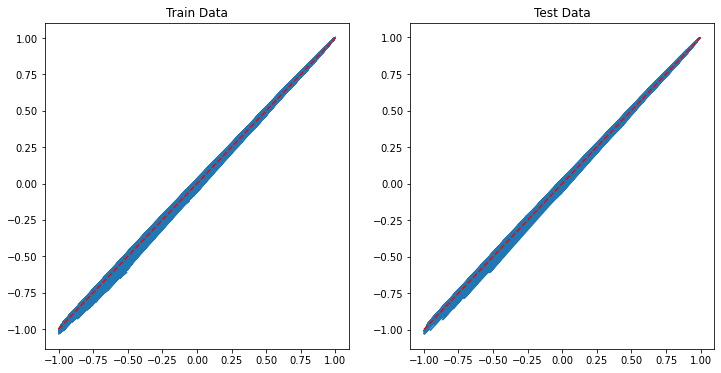

In [48]:
fig, ax = plt.subplots(1,2, figsize=(12,6))


ax[0].plot(y_train, model.predict(x_train))
ax[0].plot([-1,1],[-1,1], "--", c="red")
ax[0].set_title("Train Data")

ax[1].plot(y_test, model.predict(x_test))
ax[1].plot([-1,1],[-1,1], "--", c="red")
ax[1].set_title("Test Data")
    
plt.show()

### Save Model & Weights

In [49]:
mdlDir = f"model_{seed}.krs"

In [50]:
model.save(mdlDir)
print("@ %-11s: model saved to '%s'" %("Info", mdlDir))

INFO:tensorflow:Assets written to: model_2134671.krs\assets


INFO:tensorflow:Assets written to: model_2134671.krs\assets


@ Info       : model saved to 'model_2134671.krs'


In [51]:
model.save_weights(f'model_{seed}_NNWeights.h5')

### Load the model

In [52]:
print("@ %-11s: loading model from directory '%s'" %("Info", mdlDir))
model = keras.models.load_model(mdlDir)

@ Info       : loading model from directory 'model_2134671.krs'


In [53]:
x_chlng = test_set.drop(columns="y").copy()

In [54]:
x_chlng.head()

,x1,x2
2204,0.562012,0.023201
4505,-1.553347,-0.040075
12446,-0.009396,1.094304
7776,-0.422420,-2.086022
5166,2.441139,-0.393658


In [55]:
start = time.time()
y_chlng = model.predict(x_chlng)
stop  = time.time()
print('elapsed: ' + str(stop-start))

128/128 [==============================] - 0s 654us/step
elapsed: 0.17182421684265137


In [56]:
N_hiddenLayers = 3
N_nodes = 32

### Implementation on NN prediction via Numpy

In [59]:
N_layers = N_hiddenLayers + 1

def swish(x):
    return x/(np.exp(-x)+1)

def NNFun(input1):
    for i in range(N_layers):
        input1 = np.dot(input1, NNWeights[i][0]) + NNWeights[i][1]
        input1 = swish(input1)
    i += 1
    X = np.dot(input1, NNWeights[i][0]) + NNWeights[i][1]
    return X

### Load NN weights

In [62]:
model.load_weights(f'model_{seed}_NNWeights.h5')

NNWeights = []
for i in range(1, len(model.layers)):
    NNWeights.append(model.layers[i].get_weights())

In [67]:
NNWeights[0][0].shape, NNWeights[0][1].shape

((2, 32), (32,))

In [66]:
NNWeights[1][0].shape, NNWeights[1][1].shape

((32, 32), (32,))

In [63]:
start = time.time()
y_numpy = NNFun(x_chlng)
stop  = time.time()
y_numpy = [el[0] for el in y_numpy]
y_numpy = np.array(y_numpy)
print('elapsed: ' + str(stop-start))

elapsed: 0.012870311737060547


# analytical gradient via chain rules

In [68]:
def swishPrime(x):
    return (np.exp(-x)+1+x*np.exp(-x))/((np.exp(-x)+1)**2)

def NNGrad(input1):
    N = len(input1) 
    # k = 0
    input1 = np.dot(input1, NNWeights[0][0]) + NNWeights[0][1]
    grad = np.ndarray(shape=(N, 2, N_nodes))
    for j in range(N):
        grad[j] = NNWeights[0][0]
    sP = swishPrime(input1)
    grad *= sP[:, None, :]
    input1 = swish(input1)
    #
    for k in range(1,N_layers):
        input1 = np.dot(input1, NNWeights[k][0])
        input1 += NNWeights[k][1]
        for n in range(N):
            grad[n] = np.dot(grad[n], NNWeights[k][0])
        sP = swishPrime(input1)
        grad *= sP[:, None, :]
        input1 = swish(input1)
    grad = np.dot(grad, NNWeights[k+1][0])
    return grad

In [71]:
NNGrad(x_chlng).shape

(4096, 2, 1)

In [73]:
NNGrad(x_chlng)

array([[[ 0.4010507 ],
        [ 0.00256284]],

       [[-0.00119235],
        [ 0.03895141]],

       [[ 0.51444673],
        [-0.47610499]],

       ...,

       [[ 0.50004975],
        [-0.31843791]],

       [[ 0.16639826],
        [-0.47823207]],

       [[ 0.45734905],
        [-0.25360168]]])

### Using Backpropagation

In [86]:
def NN_backprop_gradients(input1): 
    a_deriv_list = []
    z = input1
    for i in range(N_layers):
        lin = np.dot(z, NNWeights[i][0]) + NNWeights[i][1]
        z = swish(lin)
        a_deriv_list.append(swishPrime(lin))
        
    a_deriv_list.append([[1] for i in range(len(input1))])
    out = np.dot(z, NNWeights[N_layers][0]) + NNWeights[N_layers][1]
    #print(out)
    
    delta_last = np.array([a_deriv_list[-1]])
    for kk in range(N_layers, 0, -1):
        delta_last = np.dot(delta_last, NNWeights[kk][0].T )*a_deriv_list[kk-1]
    derivatives = np.dot(delta_last, NNWeights[0][0].T)
    return derivatives

In [87]:
NN_backprop_gradients(x_chlng.values), NN_backprop_gradients(x_chlng.values).shape

(array([[[ 0.4010507 ,  0.00256284],
         [-0.00119235,  0.03895141],
         [ 0.51444673, -0.47610499],
         ...,
         [ 0.50004975, -0.31843791],
         [ 0.16639826, -0.47823207],
         [ 0.45734905, -0.25360168]]]),
 (1, 4096, 2))

### Using Tensorflow low level API

In [88]:
import tensorflow as tf

def NN_grad_tensorflow(input_data):
    x_tensor = tf.convert_to_tensor(input_data, dtype=tf.float32)
    with tf.GradientTape() as t:
        t.watch(x_tensor)
        output = model(x_tensor)
    
    result = output
    gradients = t.gradient(output, x_tensor)
    return gradients.numpy()

In [89]:
NN_grad_tensorflow(x_chlng.values), NN_grad_tensorflow(x_chlng.values).shape

(array([[ 0.40105063,  0.00256282],
        [-0.00119238,  0.03895129],
        [ 0.51444674, -0.476105  ],
        ...,
        [ 0.5000497 , -0.31843787],
        [ 0.16639833, -0.4782321 ],
        [ 0.45734903, -0.2536017 ]], dtype=float32),
 (4096, 2))

### Finite Differences

In [130]:
def finite_differences(input_data):
    finite_der = np.ndarray(shape=input_data.shape)
    h = 1e-08
    incr_x = input_data + [h,0]
    incr_y = input_data + [0,h]
    print(((NNFun(incr_x) - NNFun(input_data))/h).shape)
    finite_der[:,0] = ((NNFun(incr_x) - NNFun(input_data))/h)[:,0]
    finite_der[:,1] = ((NNFun(incr_y) - NNFun(input_data))/h)[:,0]
    return finite_der

In [131]:
finite_differences(x_chlng)

(4096, 1)


array([[ 0.40105073,  0.00256285],
       [-0.00119236,  0.03895142],
       [ 0.51444674, -0.47610499],
       ...,
       [ 0.50004972, -0.3184379 ],
       [ 0.16639825, -0.47823207],
       [ 0.45734901, -0.25360171]])

In [132]:
#x_chlng#+[1,0]

### Analytical Gradients  $ \nabla  y = ( \frac{1}{2} \cos(x_1), -\frac{1}{2} \sin(x_2)) $

In [95]:
analitycal_der = np.ndarray(shape=x_chlng.shape)
analitycal_der[:,0] = 0.5*np.cos(x_chlng.values[:,0])
analitycal_der[:,1] = -0.5*np.sin(x_chlng.values[:,1])
analitycal_der

array([[ 0.42309227, -0.01159969],
       [ 0.00872407,  0.02003226],
       [ 0.49997793, -0.44430451],
       ...,
       [ 0.49811495, -0.35103617],
       [ 0.17142043, -0.44208543],
       [ 0.44682748, -0.27000505]])

###  Why analytical gradients are differents???